### Choose and validate the window function for spectrogram generation
The Kaiser window has been chosen because it allows selecting the desired combination of stopband rejection and shape factor. The frequency response is plotted for the selected Beta parameter. A sample CW signal is filtered with the chosen function to verify the shape of the filtered signal.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift

In [2]:
window = np.kaiser(150, 6)

# window = np.hanning(150)

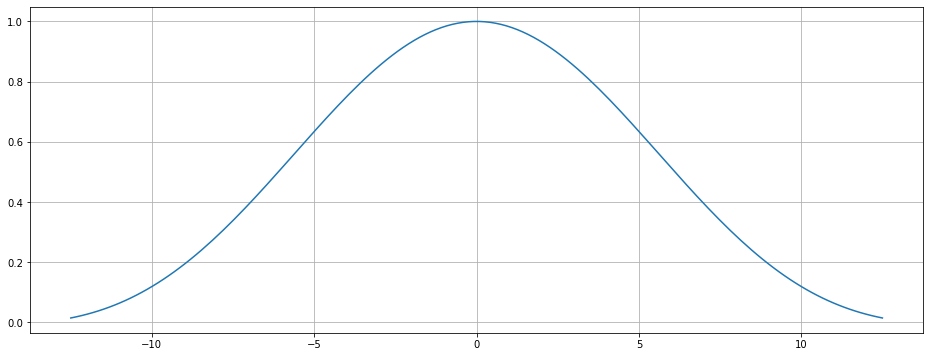

In [3]:
wlen = len(window)
time = np.linspace(-wlen/2/6, wlen/2/6, wlen) # ms
fig = plt.figure(figsize=(16, 6))
plt.plot(time, window)
plt.grid(True)
plt.show()

4096


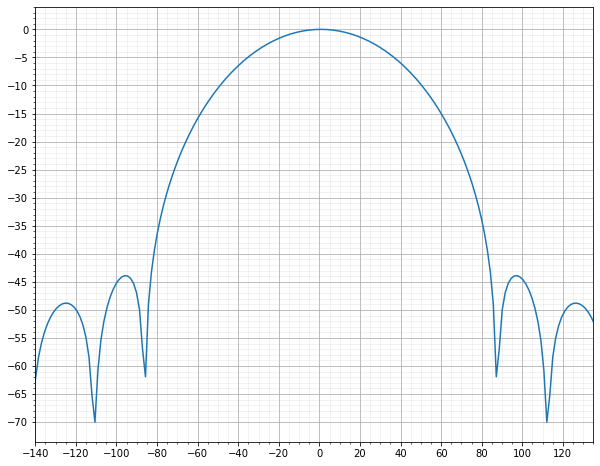

In [4]:
A = np.abs(fft(window, 4096))
print(len(A))
A = A / A[0]
mag = fftshift(A)
freq = np.linspace(-3000, 3000, len(A))
response = 20 * np.log10(mag + sys.float_info.min)
response = np.clip(response, -70, 10)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)

plt.plot(freq, response)
plt.xlim([-100, 100])
ax.set_xticks(np.arange(-140, 140, 20))
ax.set_xticks(np.arange(-140, 140, 5), minor=True)
ax.set_yticks(np.arange(-70, 5, 5))
ax.set_yticks(np.arange(-70, 5, 1), minor=True)
ax.grid(b=True, which='both')
ax.grid(b=True, which='minor', alpha=0.2)
plt.show()

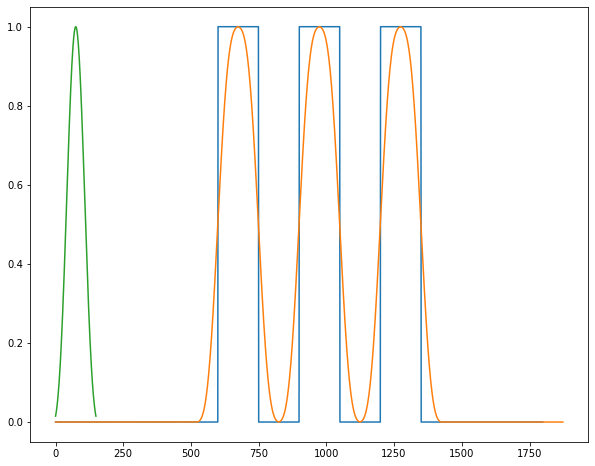

In [5]:
sig = np.zeros(300*6)
sig[100*6:125*6] = 1
sig[150*6:175*6] = 1
sig[200*6:225*6] = 1

kais = window / np.sum(window)
filtered = np.convolve(sig, kais)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(sig)
ax.plot(filtered[len(window)//2:])
ax.plot(window)
plt.show()
